In [19]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import statistics as stat
import folium
import mapclassify
import geopandas.explore

# load and clean data frame
df = pd.read_csv(r"C:\Users\krtfe\Downloads\Crimes_-_2023-Updated.csv")
df = df.dropna()

# row for number of crimes per row, for later summing
df['Number of Crimes'] = [1]*len(df)



### Shapefile creation and manipulation:

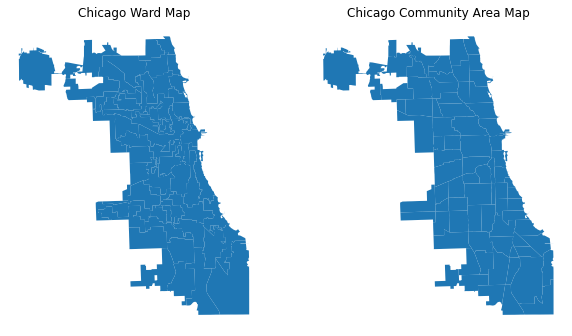

In [20]:
# reading in the shapefiles for chicago wards, chicago zip codes, and chicago community areas
chicago = gp.read_file(r"C:\Users\krtfe\Downloads\WARDS_2015\WARDS_2015.shp")
chicagoCommArea = gp.read_file(r"C:\Users\krtfe\Downloads\ChicagoComm_20Areas__1_\CommAreas.shp")

# chicago community area population information for density plot
dfCAPop = pd.read_csv(r"C:\Users\krtfe\Downloads\Chicago Community Area Populations.csv")

# altering comm area dataset for cleanliness
chicagoCommArea = chicagoCommArea.rename(columns={"AREA_NUMBE": "AREA_NUMBER"})

# creation of three shapefile maps for visualization reasons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.axis('off')
ax2.axis('off')
chicago.plot(ax = ax1);
chicagoCommArea.plot(ax = ax2);
ax1.set_title('Chicago Ward Map',
            fontdict={'fontsize': 12, 'fontweight':2});
ax2.set_title('Chicago Community Area Map',
            fontdict={'fontsize': 12, 'fontweight':2});

In [21]:
# convert ward values from string to int so they could be sorted properly
chicago['WARD'] = chicago['WARD'].astype(int)

# sort ward values so the crime values can be properly set
chicago = chicago.sort_values('WARD')

# sum the number of crimes by each ward, make it a list
crimes = df.groupby('Ward')['Number of Crimes'].sum()

# add the previous list to the shp dataframe
chicago['Number of Crimes'] = crimes.to_list()

### Total Chicago Crimes by Wards:

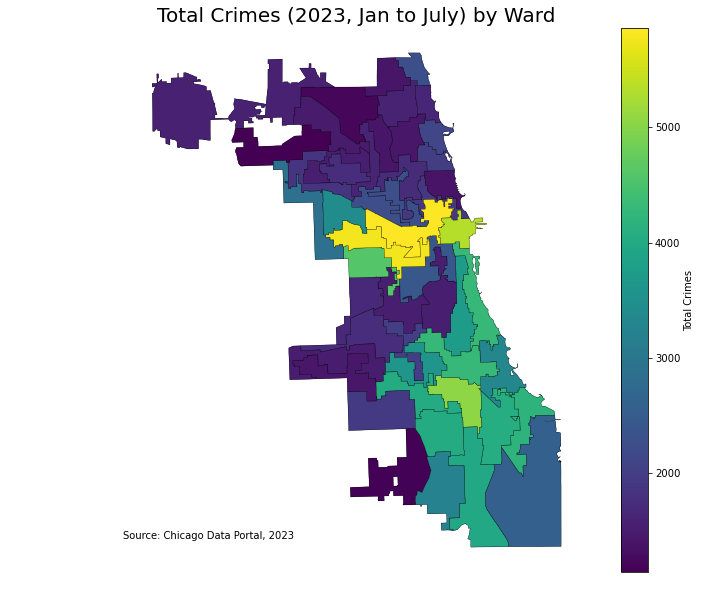

In [22]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(14,10))

# plot the chicago wards by number of crimes
chicago.plot(ax=ax, column='Number of Crimes');

# add title and remove the border
ax.axis('off')
ax.set_title('Total Crimes (2023, Jan to July) by Ward',
            fontdict={'fontsize': 20, 'fontweight':10})

# add legend to the plot
chicago.plot(ax=ax, column='Number of Crimes',
            edgecolor='black', linewidth=.3, legend=True,
            legend_kwds={'label': 'Total Crimes'}); #semicolon to get rid of unnecessary output

# source the data
ax.annotate('Source: Chicago Data Portal, 2023' ,
            xy=(0.175, 0.1),  xycoords='figure fraction', 
            fontsize=10);

### Total Chicago Crimes by Community Area

In [23]:
# convert community area values from string to int so they could be sorted properly
chicagoCommArea['AREA_NUMBER'] = chicagoCommArea['AREA_NUMBER'].astype(int)

# sort Community Area values so the crime values can be properly set
chicagoCommArea = chicagoCommArea.sort_values('AREA_NUMBER')

dfCAPop['No.'] = dfCAPop['No.'].astype(int)
dfCAPop = dfCAPop.sort_values('No.')

# population counts for the community areas
popCounts = dfCAPop['Population'].astype(int).to_list()

# adding population counts to the chicagoCommArea dataset for future usage
chicagoCommArea['Population'] = popCounts

# sum the number of crimes by each ward, make it a list
crimesCA = df.groupby('Community Area')['Number of Crimes'].sum()

# add the previous list to the shp dataframe
chicagoCommArea['Number of Crimes'] = crimesCA.to_list()

# calculate crimes by population density values for each community area
densityPop = [round(i / j, 5) for i, j in zip(crimesCA.to_list(), popCounts)]

# add the previous list to the shp dataframe
chicagoCommArea['Density of Crimes'] = densityPop

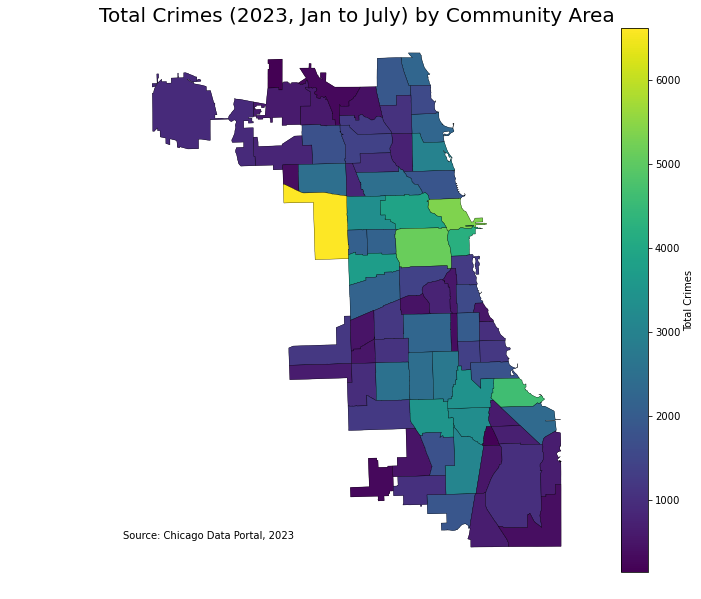

In [24]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(14,10))

# plot the chicago wards by number of crimes
chicagoCommArea.plot(ax=ax, column='Number of Crimes');

# add title and remove the border
ax.axis('off')
ax.set_title('Total Crimes (2023, Jan to July) by Community Area',
            fontdict={'fontsize': 20, 'fontweight':10})

# add legend to the plot
chicagoCommArea.plot(ax=ax, column='Number of Crimes',
            edgecolor='black', linewidth=.3, legend=True,
            legend_kwds={'label': 'Total Crimes'}); #semicolon to get rid of unnecessary output

# source the data
ax.annotate('Source: Chicago Data Portal, 2023' ,
            xy=(0.175, 0.1),  xycoords='figure fraction', 
            fontsize=10);

### Percentage of Crimes in Community Areas by Population Density

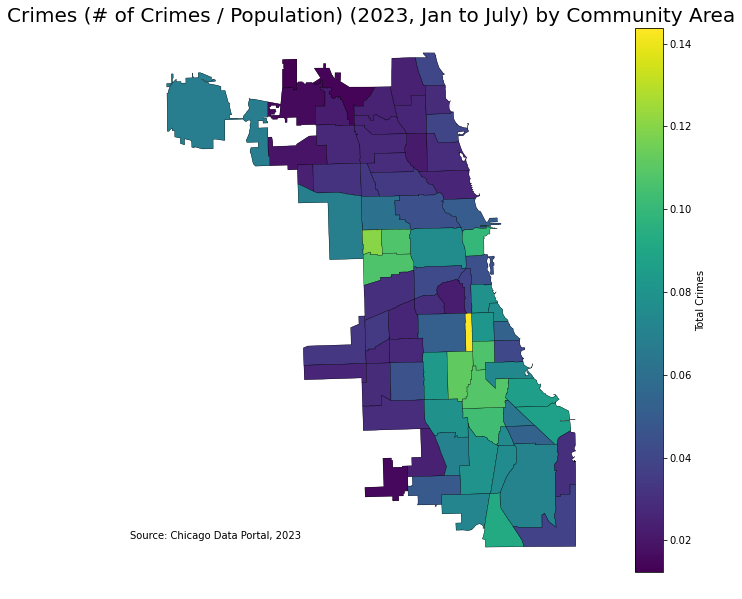

In [25]:
# set the size of the plot
fig, ax = plt.subplots(figsize=(14,10))

# plot the chicago wards by number of crimes
chicagoCommArea.plot(ax=ax, column='Density of Crimes');

# add title and remove the border
ax.axis('off')
ax.set_title('Crimes (# of Crimes / Population) (2023, Jan to July) by Community Area',
            fontdict={'fontsize': 20, 'fontweight':10})

# add legend to the plot
chicagoCommArea.plot(ax=ax, column='Density of Crimes',
            edgecolor='black', linewidth=.3, legend=True,
            legend_kwds={'label': 'Total Crimes'}); #semicolon to get rid of unnecessary output

# source the data
ax.annotate('Source: Chicago Data Portal, 2023' ,
            xy=(0.175, 0.1),  xycoords='figure fraction', 
            fontsize=10);

### Total Crimes and Percentage of Crimes by Community Area

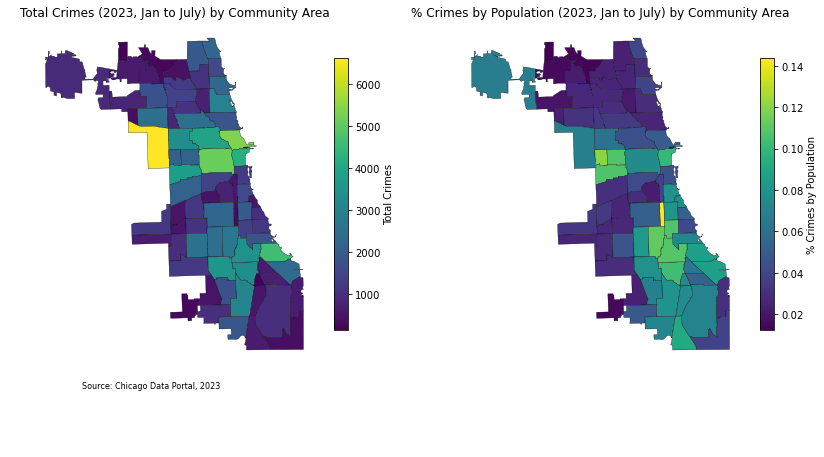

In [26]:
# set the size of the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,10))

# add title and remove the border
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Total Crimes (2023, Jan to July) by Community Area',
            fontdict={'fontsize': 12, 'fontweight':10})
ax2.set_title('% Crimes by Population (2023, Jan to July) by Community Area',
            fontdict={'fontsize': 12, 'fontweight':10})

# add legend to the plot
chicagoCommArea.plot(ax=ax1, column='Number of Crimes',
            edgecolor='black', linewidth=.3, legend=True,
            legend_kwds={'label': 'Total Crimes', 'shrink': 0.5}); #semicolon to get rid of unnecessary output
# add legend to the plot
chicagoCommArea.plot(ax=ax2, column='Density of Crimes',
            edgecolor='black', linewidth=.3, legend=True,
            legend_kwds={'label': '% Crimes by Population', 'shrink': 0.5}); #semicolon to get rid of unnecessary output

# source the data
ax1.annotate('Source: Chicago Data Portal, 2023' ,
            xy=(0.1, 0.15),  xycoords='figure fraction', 
            fontsize=8);

### Interactive Map; Density of Crimes by Population in Chicago Community Areas:

In [29]:
# altering comm area dataset for cleanliness
chicagoCommArea = chicagoCommArea.rename(columns={"AREA_NUMBER": "Community Area Number", "COMMUNITY": "Community Name"})

# control how a user can drag and scroll through a visual
geopandas.explore._MAP_KWARGS += ["dragging", "scrollWheelZoom"]

# printing the interactive data
m = chicagoCommArea.explore(
    column="Density of Crimes",  # make choropleth based on "POP2010" column
    width = '50%',
    height = '85%',
    legend=True,  # show legend
    tooltip=False,  # hide tooltip
    popup=["Community Name", "Community Area Number", "Number of Crimes", 
           "Density of Crimes", "Population"],  # show popup (on-click)
    name = 'Density',
    dragging = False,
#     scrollWheelZoom = False,
)

In [30]:
m

### Interactive map; Total Crimes in Chicago Community Areas

In [33]:
m = chicagoCommArea.explore(
    column="Number of Crimes",  # make choropleth based on "POP2010" column
    width = '50%',
    height = '85%',
    legend=True,  # show legend
    tooltip=False,  # hide tooltip
    popup=["Community Name", "Community Area Number", "Number of Crimes", 
           "Density of Crimes", "Population"],  # show popup (on-click)
    name="Total",  # name of the layer in the map
    dragging = False,
)


In [34]:
m